In [127]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import numpy as np

from osgeo import gdal,osr,ogr
import matplotlib.pyplot as plt
import gdal
import rasterio

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
# import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader
import matplotlib.colors as colors
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import geopandas
import salem

In [128]:
model=salem.open_wrf_dataset('/mnt/e/wrf_tibet/test/pre_test2003summer/wrfout_tibet_2003_summer_control')

In [129]:
modis=salem.open_xr_dataset('/mnt/e/wrf_tibet/data/verify_data/lai_tibet_2003_july_30km.tif')

In [130]:
tibet_shp=geopandas.read_file('/mnt/f/data/shp/Tibet/TP_WGS84.shp')

In [131]:
modis

<xarray.Dataset>
Dimensions:  (x: 117, y: 52)
Coordinates:
  * x        (x) float64 73.3 73.57 73.84 74.11 ... 103.8 104.0 104.3 104.6
  * y        (y) float64 39.89 39.62 39.35 39.08 ... 26.95 26.68 26.41 26.14
Data variables:
    data     (y, x) float64 7.73 7.507 7.103 6.699 ... 22.92 22.94 22.97 22.9
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [132]:
lai_model=model.LAI

In [133]:
lai_model_month=lai_model.groupby('time.month').mean()

In [134]:
lai_model_july=lai_model_month.sel(month=7)
#lai_model_month.salem.transform(modis)

In [135]:
lai_tibet_model=lai_model.salem.roi(shape=tibet_shp)

In [136]:
#lai_model_july.to_netcdf('/mnt/e/wrf_tibet/data/verify_data/lai_tmodel_2003_july_30km.nc')

In [137]:
lai_modis=salem.open_wrf_dataset('/mnt/e/wrf_tibet/data/verify_data/lai_tibet_2003_aug_30km.nc')

In [138]:
lai_tibet_modis=lai_modis.salem.roi(shape=tibet_shp)

In [139]:
lai_tibet_model_monthly=lai_tibet_model.groupby('time.month').mean()
lai_tibet_model_july=lai_tibet_model_monthly.sel(month=7)*1000

In [140]:
lai_model

<xarray.DataArray 'LAI' (time: 721, south_north: 171, west_east: 231)>
[28480221 values with dtype=float32]
Coordinates:
    lat          (south_north, west_east) float32 8.361839 ... 48.142765
    lon          (south_north, west_east) float32 82.610504 ... 161.61536
    xtime        (time) datetime64[ns] ...
  * time         (time) datetime64[ns] 2003-06-01T12:00:00 ... 2003-08-30T12:...
  * west_east    (west_east) float64 -3.45e+06 -3.42e+06 ... 3.42e+06 3.45e+06
  * south_north  (south_north) float64 -2.55e+06 -2.52e+06 ... 2.52e+06 2.55e+06
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LEAF AREA INDEX
    units:        m-2/m-2
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=35.1800193786621 +lon_0=110 +lat_1=30 +lat...

In [141]:
lai_tibet_model_july.to_netcdf('/mnt/e/wrf_tibet/data/verify_data/lai_tibet_model_july2.nc')

In [164]:
lai_tibet_model_july.to_netcdf('/mnt/e/wrf_tibet/data/verify_data/model_lai_tibet_2003_july_mean.nc')

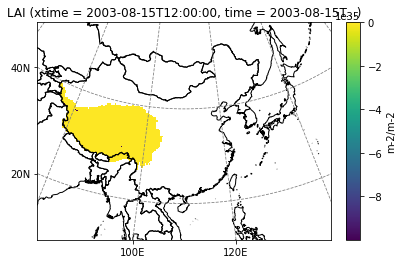

In [168]:
lai_tibet_model.isel(time=600).salem.quick_map()

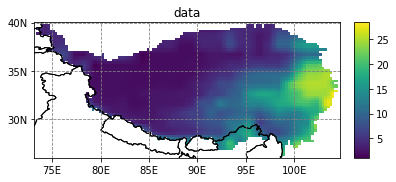

In [174]:
lai_tibet_modis.data.salem.quick_map()

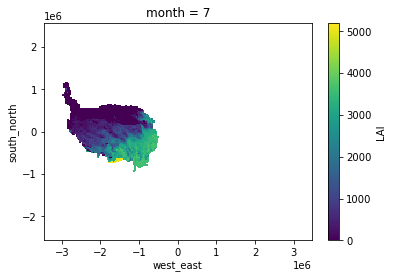

In [166]:
lai_tibet_model_july.plot()

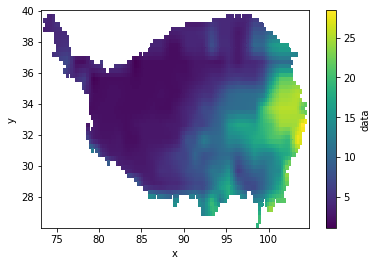

In [165]:
lai_tibet_modis.data.plot()

In [160]:
#lai_tibet_modis.data.to_netcdf('/mnt/e/wrf_tibet/data/verify_data/modis_lai_tibet_2003_july_mean.nc')

In [144]:
from osgeo import gdal
import matplotlib.pyplot as plt
import salem
import numpy as np

In [175]:
lai_model_7=gdal.Open('/mnt/e/wrf_tibet/data/verify_data/model_lai_tibet_2003_july_mean.nc')

In [146]:
lai_modis_7=salem.open_xr_dataset('/mnt/e/wrf_tibet/data/verify_data/lai_tibet_2003_july_30km.tif')

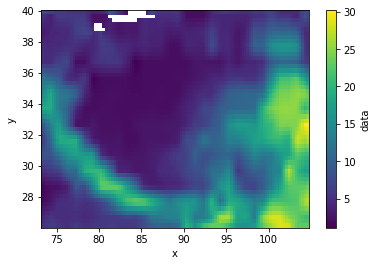

In [147]:
lai_modis_7.data.plot()

In [148]:
array=lai_model_7.ReadAsArray()

In [176]:
lai_reprj=gdal.Warp('/mnt/e/wrf_tibet/data/verify_data/model_lai_tibet_2003_july_mean_reprj.nc',
                    lai_model_7,
                    dstSRS = 'EPSG:4326'
                   )

In [150]:
lai_model_7_reprj=gdal.Open('/mnt/e/wrf_tibet/data/verify_data/lai_tmodel_2003_july_30km_reprj.nc')

In [151]:
lai_model_7_reprj

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fdea15fee40> >

<ipython-input-152-374da0bc7ebf>:1: RuntimeWarning: overflow encountered in multiply
  plt.imshow(lai_reprj.ReadAsArray()*1000)


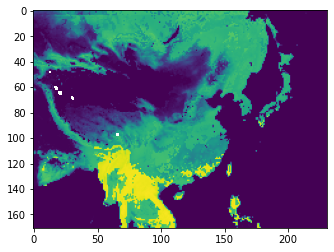

In [152]:
plt.imshow(lai_reprj.ReadAsArray()*1000)

<ipython-input-153-6089d30b658b>:1: RuntimeWarning: overflow encountered in multiply
  plt.imshow(lai_model_7.ReadAsArray()*1000)


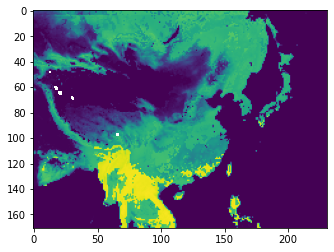

In [153]:
plt.imshow(lai_model_7.ReadAsArray()*1000)

<ipython-input-154-18f927964e30>:1: RuntimeWarning: overflow encountered in multiply
  plt.imshow(lai_model_7_reprj.ReadAsArray()*1000)


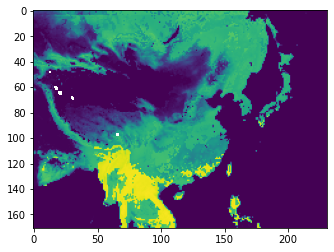

In [154]:
plt.imshow(lai_model_7_reprj.ReadAsArray()*1000)

In [155]:
lai_model_7_reprj

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fdea15fee40> >

In [156]:
bounds=(float(lai_modis_7.x.min())+2,
              float(lai_modis_7.y.min())+2,
              float(lai_modis_7.x.max())-2,
              float(lai_modis_7.y.max())-2
             )
bounds

(75.30252718415295, 28.140974767878078, 102.5638990715123, 37.885198614906756)

In [157]:
lai_reprj_res=gdal.Warp('/mnt/e/wrf_tibet/data/verify_data/lai_model_2003_july_30km_reprj_resample.nc',
                    lai_model_7,
                    xRes = 30000,
                    yRes = 30000,
                    resampleAlg = 'bilinear',
                    outputBounds=bounds,
                    outputBoundsSRS='EPSG:4326'
                   )

In [158]:
lai_reprj_res=gdal.Open('/mnt/e/wrf_tibet/data/verify_data/lai_model_2003_july_30km_reprj_resample.nc')

In [ ]:
plt.imshow(lai_reprj_res.ReadAsArray()*1000)